###Question 1:
Generate a dataset for linear regression with 1000 samples, 5 features and single target.

Visualize the data by plotting the target column against each feature column. Also plot the best fit line in each case.

Hint : search for obtaining regression line using numpy.

(1000, 5)
(1000,)


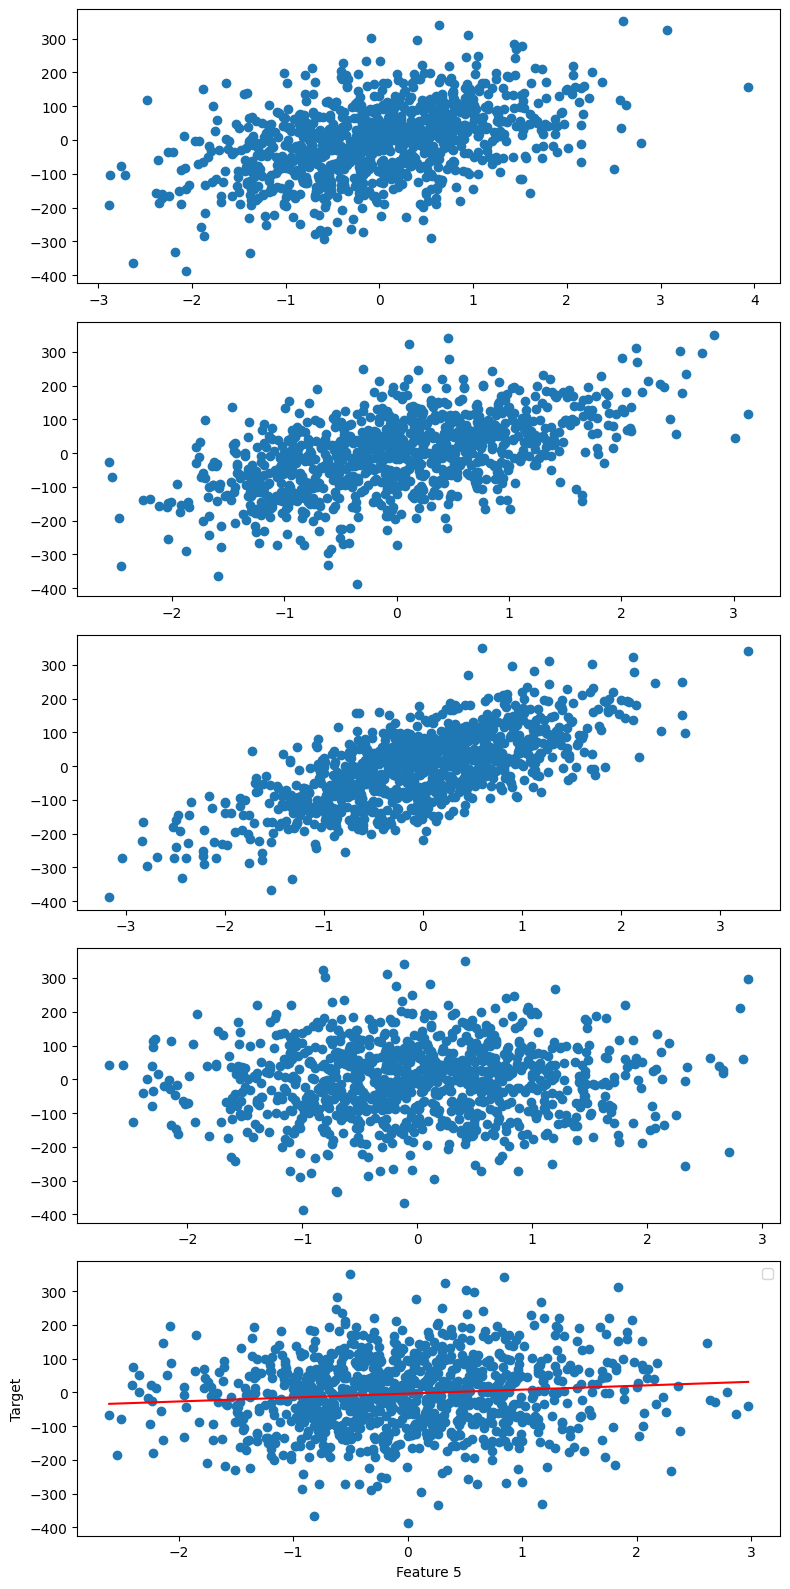

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression as mr
from sklearn.linear_model import LinearRegression as lr
X,y=mr(n_samples=1000, n_features=5, n_targets=1)
print(X.shape)
print(y.shape)
fig, axs = plt.subplots(5, 1, figsize=(8, 16))
for i in range(5):
    ax = axs[i]
    ax.scatter(X[:, i], y)
reg=lr()
reg.fit(X[:, i].reshape(-1, 1), y)
x_line = np.linspace(np.min(X[:, i]), np.max(X[:, i]), 100)
y_line = reg.predict(x_line.reshape(-1, 1))
ax.plot(x_line, y_line, color='red')
    
ax.set_xlabel('Feature {}'.format(i+1))
ax.set_ylabel('Target')
ax.legend()

plt.tight_layout()
plt.show()

### Question 2:
Make a classification dataset of 1000 samples with 2 features, 2 classes and 2 clusters per class.
Plot the data.

In [ ]:
from sklearn.datasets import make_classification
X,y= make_classification(n_samples=1000,n_features=2, n_informative=0, n_redundant=0,n_classes=2,n_clusters_per_class=2)
print(X.shape)
print(y.shape)

plt.scatter(X[:, 0],X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

ValueError: ignored

### Question 3:
Make a clustering dataset with 2 features and 4 clusters.

In [ ]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=1000, centers=4, n_features=2)
print(X.shape)
print(y.shape)

plt.scatter(X[:, 0],X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Question 4
Go to the website https://www.worldometers.info/coronavirus/ and scrape the table containing covid-19 infection and deaths data using requests and BeautifulSoup.  Convert the table to a Pandas dataframe with the following columns : Country, Continent, Population, TotalCases, NewCases, TotalDeaths, NewDeaths,TotalRecovered, NewRecovered,  ActiveCases.

*(<b>Optional Challenge :</b> Change the data type of the Columns (Population ... till ActiveCases) to integer. For that you need to remove the commas and plus signs. You may need to use df.apply() and pd.to_numeric() . Take care of the values which are empty strings.)

In [ ]:
import requests as req
url = 'https://www.worldometers.info/coronavirus/'
response= req.get(url)
print(response.status_code)
from bs4 import BeautifulSoup
soup = BeautifulSoup(response.text, 'lxml')
table = soup.find('table', class_='covid-19')
print(table)
headers = []
first_row=table.find('tr');

for i in first_row.find_all('th'):
 title = i.text
 headers.append(title)
 headers = []
first_row=table.find('tr');

data.append([country, continent, population, total_cases, new_cases,total_deaths, new_deaths, total_recovered, new_recovered,active_cases])
print(headers)
import pandas as pd
columns = [
    "Country", "Continent", "Population", "TotalCases", "NewCases",
    "TotalDeaths", "NewDeaths", "TotalRecovered", "NewRecovered",
    "ActiveCases"
]
df = pd.DataFrame(data, columns=columns)
print(mydata)


200
None


AttributeError: ignored

# Question 5

Generate an imbalanced classification dataset using sklearn of 1000 samples with 2 features, 2 classes and 1 cluster per class. Plot the data. One of the class should contain only 5% of the total samples. Confirm this either using numpy or Counter. Plot the data.

Now oversample the minority class to 5 times its initial size using SMOTE. Verify the number. Plot the data.

Now undersample the majority class to 3 times the size of minority class using RandomUnderSampler. Verify the number. Plot the data.

Reference : Last markdown cell of the examples.

Class Distribution: Counter({1: 941, 0: 59})


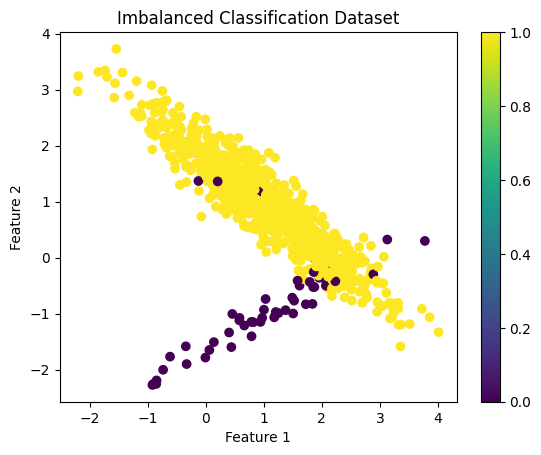

Class Distribution after SMOTE: Counter({1: 941, 0: 941})


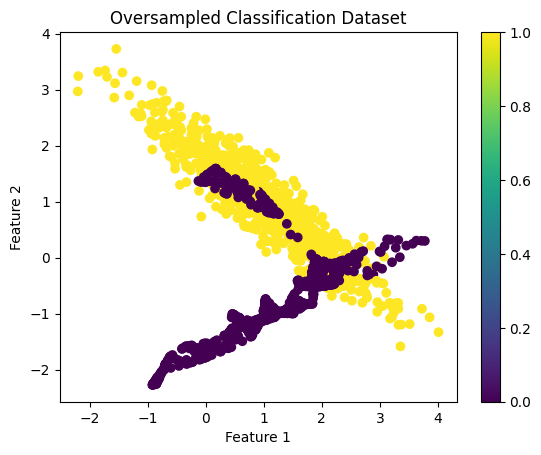

InvalidParameterError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter


num_samples = 1000
num_features = 2
num_classes = 2
imbalance_ratio = 0.05

X, y = make_classification(
    n_samples=num_samples,
    n_features=num_features,
    n_informative=num_features,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[imbalance_ratio, 1 - imbalance_ratio],
    random_state=42
)


class_distribution = Counter(y)
print("Class Distribution:", class_distribution)


plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Imbalanced Classification Dataset')
plt.colorbar()
plt.show()


oversampler = SMOTE(sampling_strategy='auto', random_state=42)
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)


oversampled_class_distribution = Counter(y_oversampled)
print("Class Distribution after SMOTE:", oversampled_class_distribution)


plt.scatter(X_oversampled[:, 0], X_oversampled[:, 1], c=y_oversampled, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Oversampled Classification Dataset')
plt.colorbar()
plt.show()


undersampler = RandomUnderSampler(sampling_strategy=3, random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)


undersampled_class_distribution = Counter(y_undersampled)
print("Class Distribution after RandomUnderSampler:", undersampled_class_distribution)


plt.scatter(X_undersampled[:, 0], X_undersampled[:, 1], c=y_undersampled, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Undersampled Classification Dataset')
plt.colorbar()
plt.show()


##Question 6

Write a Python code to perform data preprocessing on a dataset using the scikit-learn library. Follow the instructions below:

 * Load the dataset using the scikit-learn `load_iris` function.
 * Assign the feature data to a variable named `X` and the target data to a variable named `y`.
 * Create a pandas DataFrame called `df` using `X` as the data and the feature names obtained from the dataset.
 * Display the first 5 rows of the DataFrame `df`.
 *  Check if there are any missing values in the DataFrame and handle them accordingly.
 * Split the data into training and testing sets using the `train_test_split` function from scikit-learn. Assign 70% of the data to the training set and the remaining 30% to the testing set.
 * Print the dimensions of the training set and testing set respectively.
 *  Standardize the feature data in the training set using the `StandardScaler` from scikit-learn.
 *  Apply the same scaling transformation on the testing set.
 * Print the first 5 rows of the standardized training set.

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset using load_iris
iris = load_iris()

# Assign the feature data to X and the target data to y
X = iris.data
y = iris.target

# Create a pandas DataFrame called df
df = pd.DataFrame(X, columns=iris.feature_names)

# Display the first 5 rows of the DataFrame df
print(df.head())

# Check for missing values in the DataFrame
print("Missing values in the DataFrame:", df.isnull().sum())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the dimensions of the training set and testing set
print("Training set dimensions:", X_train.shape)
print("Testing set dimensions:", X_test.shape)

# Standardize the feature data in the training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaling transformation on the testing set
X_test_scaled = scaler.transform(X_test)

# Print the first 5 rows of the standardized training set
df_train_scaled = pd.DataFrame(X_train_scaled, columns=iris.feature_names)
print(df_train_scaled.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Missing values in the DataFrame: sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64
Training set dimensions: (105, 4)
Testing set dimensions: (45, 4)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.413416         -1.462003          -0.099511         -0.323398
1           0.551222         -0.502563           0.717703          0.353032
2           0.671802          0.217016           0.951192          0.758890
3           0.912961         -0.0228